In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from bing_helper import load_json_files, get_hits_from_json, load_lang_news_hits
from regression import fit_regression_and_rename_coeffs_by_cat, fit_regression_and_rename_coeffs, write_reg_results
from processing import filter_by_region_cat_code, build_regression_dataframe, load_preprocessed_events
from plot_regression import plot_regression_results, plot_regression_results_interactions, plot_country_counts, plot_regression_results_interactions_from_dict, plot_cat_by_cat_variable
from preprocessing import load_if_in_country_or_lang

%load_ext autoreload
%autoreload 2

## load Data


In [2]:
df_crawled = pd.read_csv('events/new/processed_0_manually_with_wikiviews.csv').drop_duplicates()

# Visualize category count
The function plot_cat_by_cat allows for arbitrary visualization (across 3 categorical variables).

from left to right, the following parameters decide the plotting order:
- col_plot => the variable used for the separate plots
- col_x => the variable on the x axis of the separate plots
- col_bar => the column used for the (stacked) bar charts

Additional parameters decide whether or not to make the barcharts stacked ("stacked") or whether they should share their y axis ("sharey")

In [3]:
from plot_regression import plot_cat_by_cat

In [4]:
# excluding all articles that have no category or less than 10 recorded views in the week after the event happened
df_filtered = df_crawled[(df_crawled.cat != 'undefined') & (df_crawled.views_7_sum > np.log1p(10))]

## some demos

... language ("code"), year ("code") and by article category (cat).
Uses a shared y axis and stacked bar charts.

In [5]:
import matplotlib as mpl
from matplotlib import rc

In [19]:
plt.rcdefaults()
plt.rcParams['font.sans-serif']


['DejaVu Sans',
 'Bitstream Vera Sans',
 'Computer Modern Sans Serif',
 'Lucida Grande',
 'Verdana',
 'Geneva',
 'Lucid',
 'Arial',
 'Helvetica',
 'Avant Garde',
 'sans-serif']

In [15]:
plt.rcParams.update({'font.family': 'sans-serif', 'font.sans-serif':'Verdana'})

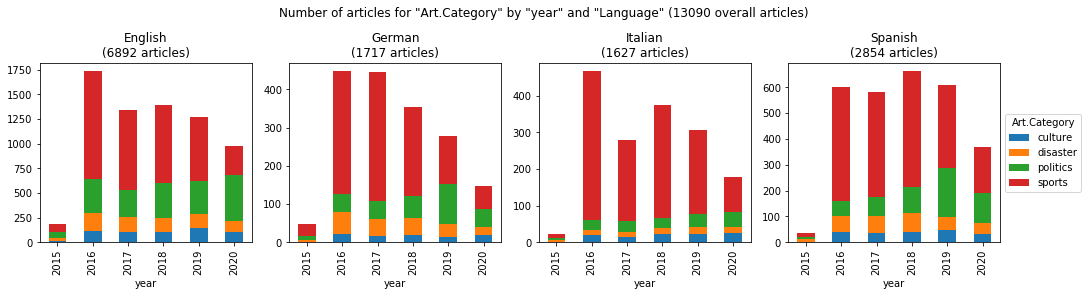

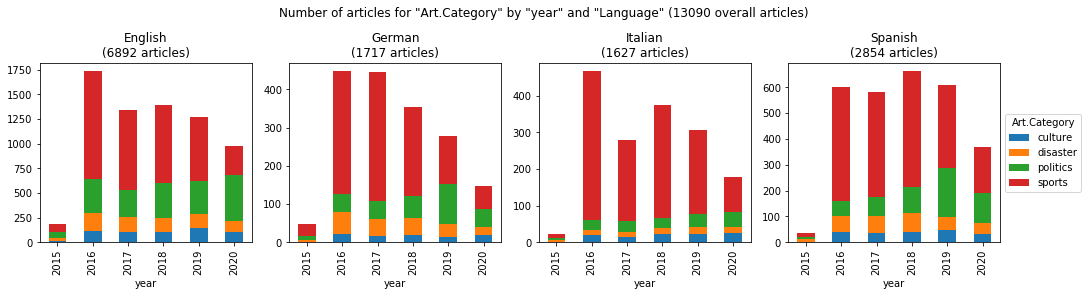

In [16]:
#rc('font',**{'family':'sans-serif','sans-serif':['Liberation Mono']})
#rc('text', usetex=False)
plot_cat_by_cat_variable(df_filtered, col_plot='code', col_x='year', col_bar='cat', stacked=True, sharey=False)

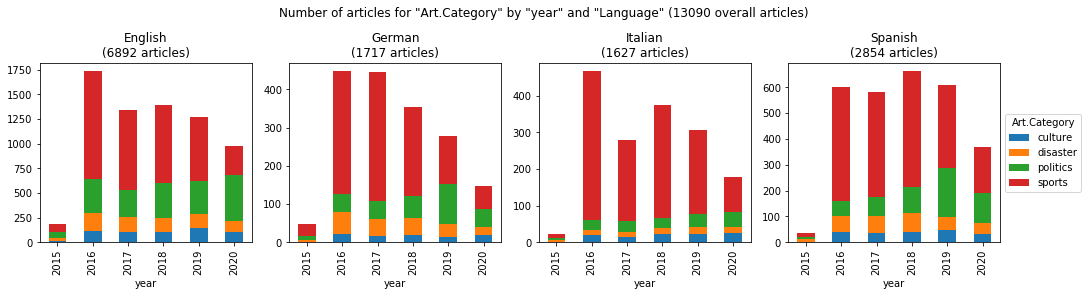

In [138]:
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Gillius ADF'
fig1 = plot_cat_by_cat_variable(df_filtered, col_plot='code', col_x='year', col_bar='cat', stacked=True, sharey=False)

In [142]:
plt.rcParams['font.sans-serif']

['Gillius ADF']

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


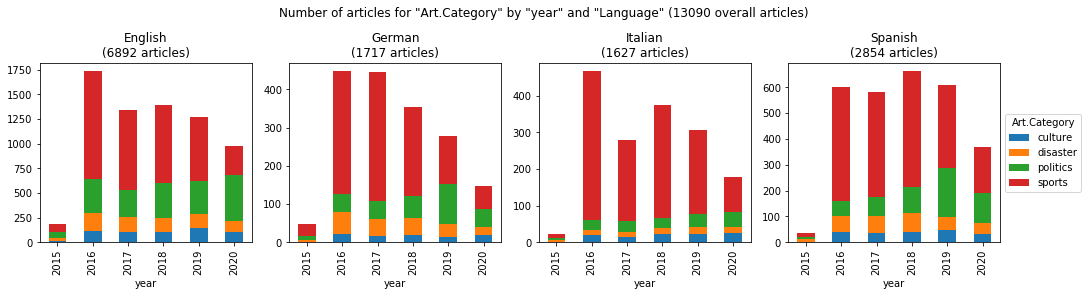

In [132]:
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Noto Sans'
plot_cat_by_cat_variable(df_filtered, col_plot='code', col_x='year', col_bar='cat', stacked=True, sharey=False)

... by language ("code"), article category (cat), and region ("gni_region")
Uses a separate y-axis but stacked bar charts.

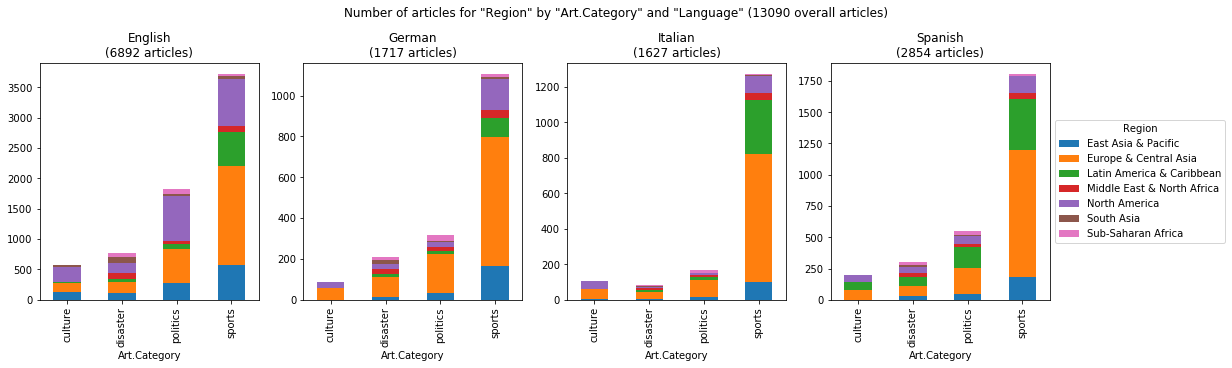

In [133]:
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'DejaVu Sans'
plot_cat_by_cat_variable(df_filtered, 'code', 'cat', 'gni_region', stacked=True, sharey=False, figsize=(17,5))

... by language ("code"), income class ("gni_class"), and article category ("cat")
Uses a separate y-axis and separate bar charts.

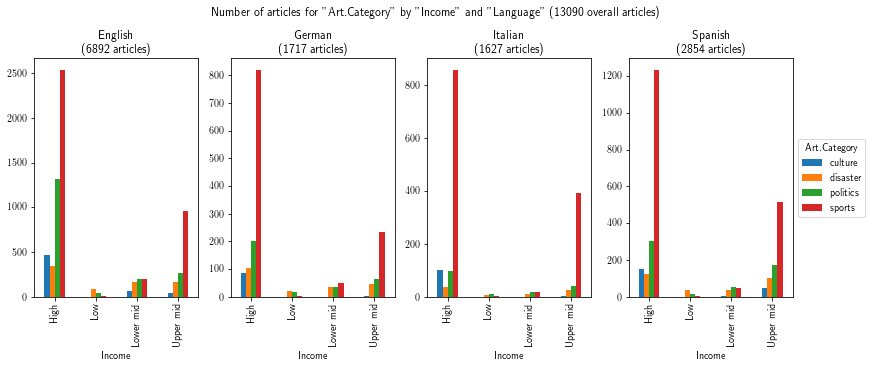

In [59]:
plot_cat_by_cat_variable(df_filtered, 'code', 'gni_class', 'cat', stacked=False, sharey=False, figsize=(12,5))

### Some combinations with shared y axis for region and income class

In [60]:
# Number of articles for cat-region-code
plot_cat_by_cat_variable(df_filtered, 'cat', 'gni_region', 'code', stacked=True, sharey=True, figsize=(15,5))
plot_cat_by_cat_variable(df_filtered, 'code', 'gni_region', 'cat', stacked=True, sharey=True, figsize=(15,5))
plot_cat_by_cat_variable(df_filtered, 'code', 'cat', 'gni_region' , stacked=True, sharey=True, figsize=(15,5))
plot_cat_by_cat_variable(df_filtered, 'gni_region', 'cat', 'code', stacked=True, sharey=True, figsize=(18,5))

RuntimeError: latex was not able to process the following string:
b'East Asia & Pacific'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/f92ecc544316c96cf4cf7760c77f29df.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 7 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./f92ecc544316c96cf4cf7760c77f29df.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Misplaced alignment tab character &.
l.14 ...0.000000}{12.500000}{\sffamily East Asia &
                                                   Pacific}
No pages of output.
Transcript written on f92ecc544316c96cf4cf7760c77f29df.log.




<Figure size 1080x360 with 4 Axes>

RuntimeError: latex was not able to process the following string:
b'East Asia & Pacific'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/f92ecc544316c96cf4cf7760c77f29df.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 7 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./f92ecc544316c96cf4cf7760c77f29df.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Misplaced alignment tab character &.
l.14 ...0.000000}{12.500000}{\sffamily East Asia &
                                                   Pacific}
No pages of output.
Transcript written on f92ecc544316c96cf4cf7760c77f29df.log.




<Figure size 1080x360 with 4 Axes>

RuntimeError: latex was not able to process the following string:
b'East Asia & Pacific'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/f92ecc544316c96cf4cf7760c77f29df.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 7 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./f92ecc544316c96cf4cf7760c77f29df.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Misplaced alignment tab character &.
l.14 ...0.000000}{12.500000}{\sffamily East Asia &
                                                   Pacific}
No pages of output.
Transcript written on f92ecc544316c96cf4cf7760c77f29df.log.




<Figure size 1080x360 with 4 Axes>

RuntimeError: latex was not able to process the following string:
b'East Asia & Pacific'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/c3820f7f7a103bf3b79b943f4b553e6f.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 7 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

)
No file c3820f7f7a103bf3b79b943f4b553e6f.aux.
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Misplaced alignment tab character &.
l.14 ...2.000000}{15.000000}{\sffamily East Asia &
                                                   Pacific}
No pages of output.
Transcript written on c3820f7f7a103bf3b79b943f4b553e6f.log.




<Figure size 1296x360 with 7 Axes>

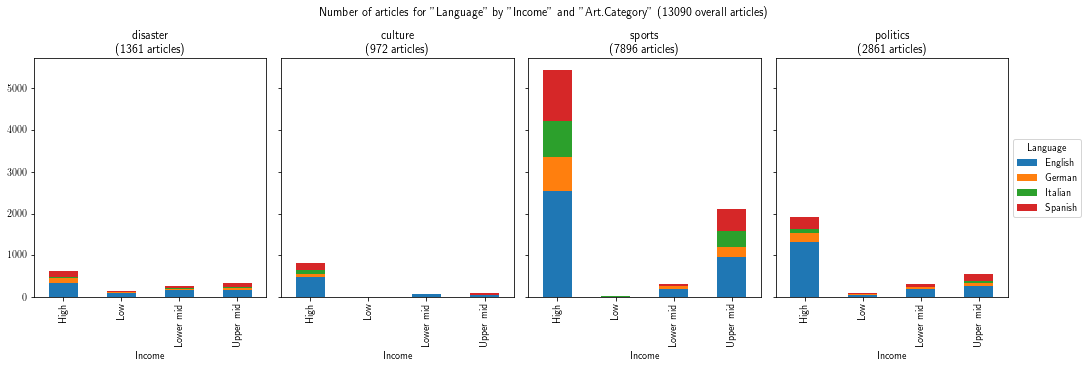

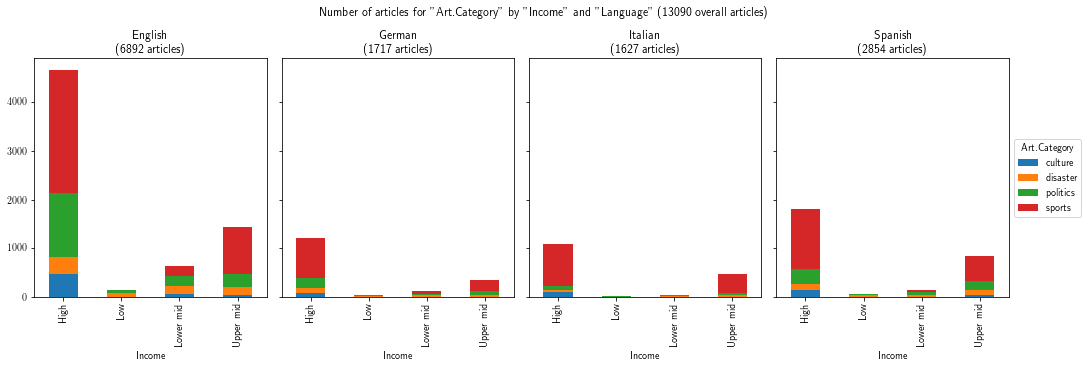

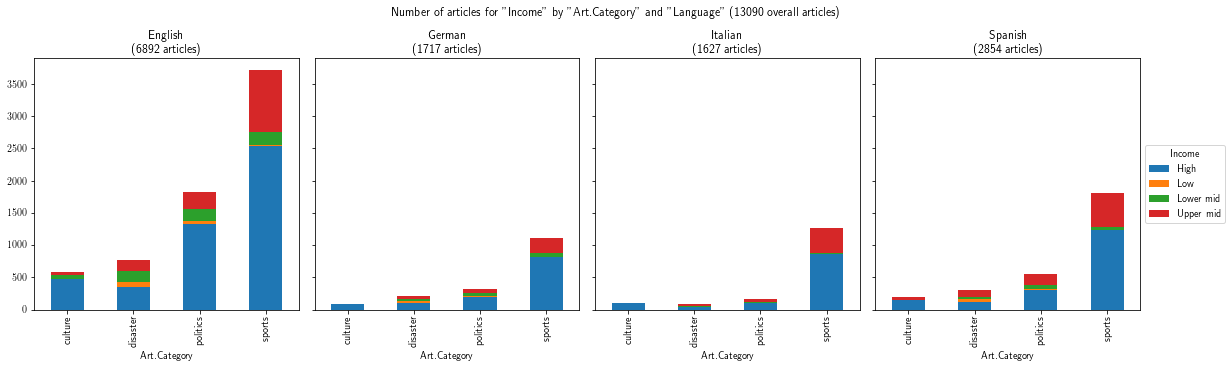

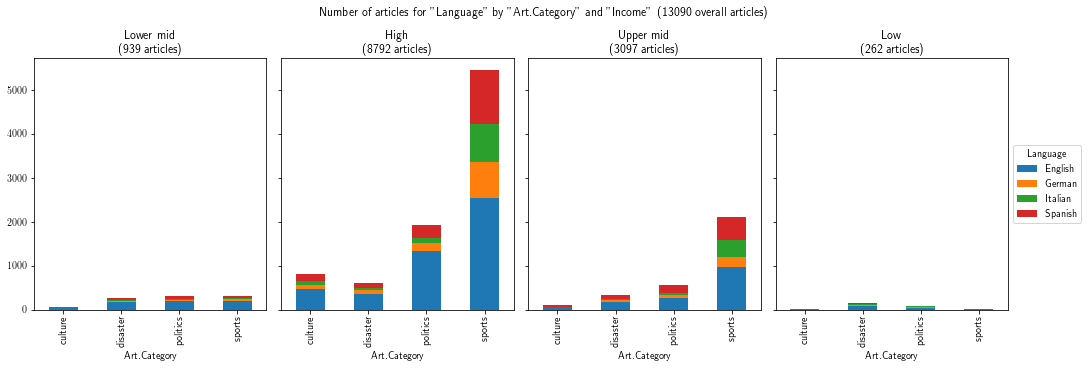

In [61]:
# Number of articles for cat-income class-code
plot_cat_by_cat_variable(df_filtered, 'cat', 'gni_class', 'code', stacked=True, sharey=True, figsize=(15,5))
plot_cat_by_cat_variable(df_filtered, 'code', 'gni_class', 'cat', stacked=True, sharey=True, figsize=(15,5))
plot_cat_by_cat_variable(df_filtered, 'code', 'cat', 'gni_class' , stacked=True, sharey=True, figsize=(17,5))
plot_cat_by_cat_variable(df_filtered, 'gni_class', 'cat', 'code', stacked=True, sharey=True, figsize=(15,5))